Normalized Columns: ['id', 'source', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 'description', 'street', 'city', 'county', 'state', 'zipcode', 'country', 'timezone', 'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction', 'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity', 'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal', 'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight', 'astronomical_twilight']


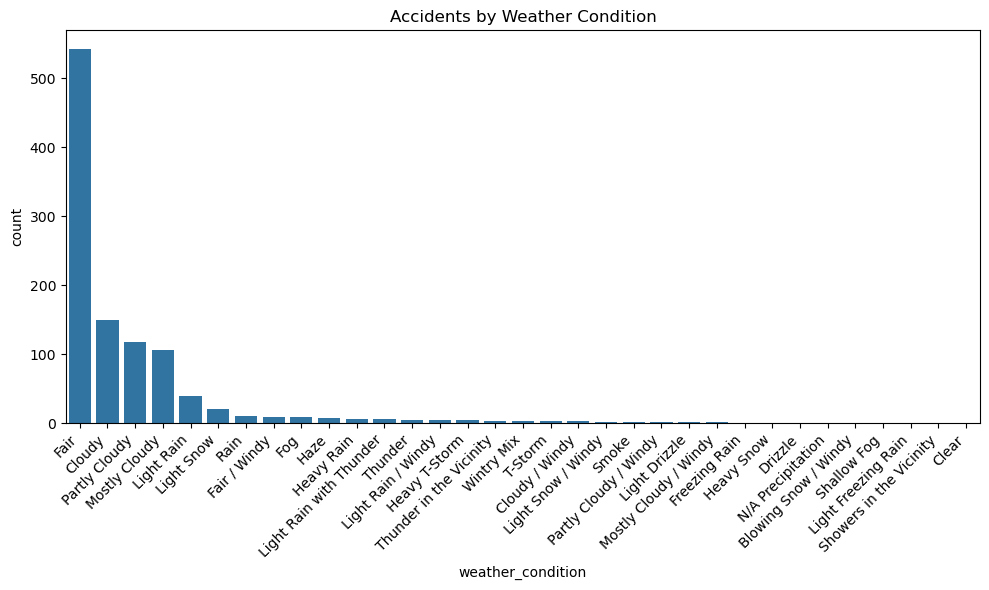

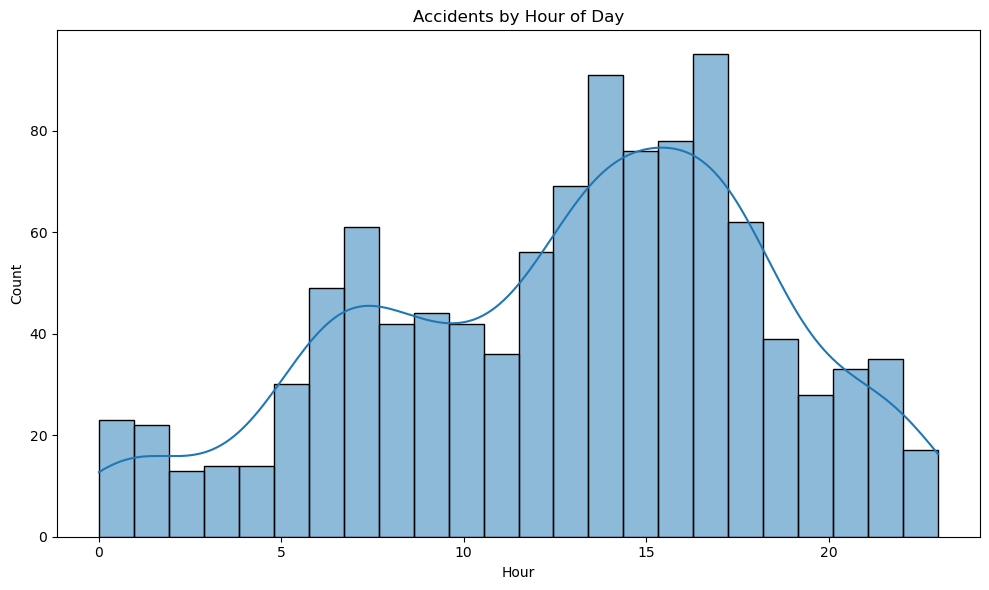

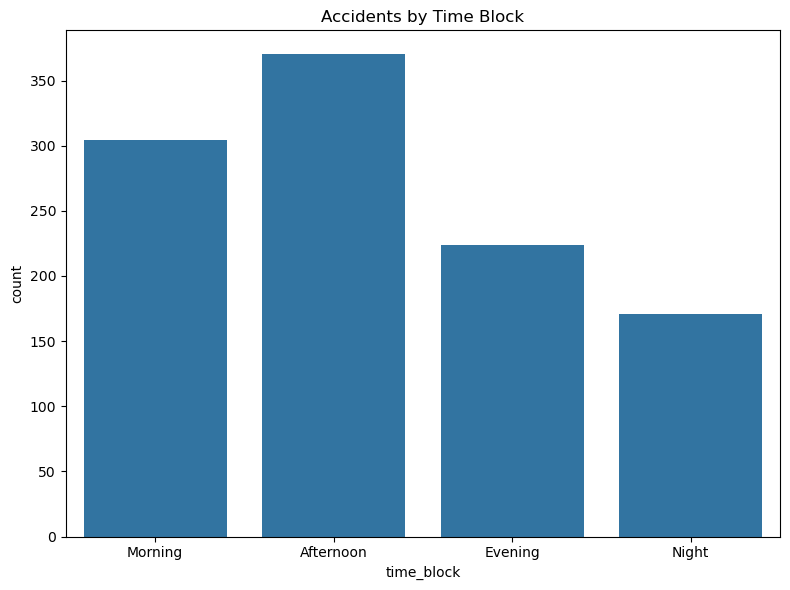

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('accidents_sample.csv')

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print normalized column names for reference
print("Normalized Columns:", df.columns.tolist())

# Identify key columns dynamically
lat_col = next((col for col in df.columns if 'lat' in col), None)
lon_col = next((col for col in df.columns if 'lon' in col), None)
road_col = next((col for col in df.columns if 'road' in col), None)
weather_col = next((col for col in df.columns if 'weather' in col and 'timestamp' not in col), None)
time_col = next((col for col in df.columns if 'time' in col or 'timestamp' in col), None)

# Convert time column to datetime and extract hour
if time_col:
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df['hour'] = df[time_col].dt.hour

# Drop rows with missing values in key columns
drop_cols = [col for col in [lat_col, lon_col, road_col, weather_col, 'hour'] if col in df.columns]
df.dropna(subset=drop_cols, inplace=True)

# --- Accidents by Road Condition ---
if road_col:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=road_col, order=df[road_col].value_counts().index)
    plt.title('Accidents by Road Condition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- Accidents by Weather Condition ---
if weather_col:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=weather_col, order=df[weather_col].value_counts().index)
    plt.title('Accidents by Weather Condition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- Accidents by Hour of Day ---
if 'hour' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df['hour'], bins=24, kde=True)
    plt.title('Accidents by Hour of Day')
    plt.xlabel('Hour')
    plt.tight_layout()
    plt.show()

    # Optional: Group hours into time blocks
    def time_block(hour):
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'

    df['time_block'] = df['hour'].apply(time_block)
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x='time_block', order=['Morning', 'Afternoon', 'Evening', 'Night'])
    plt.title('Accidents by Time Block')
    plt.tight_layout()
    plt.show()

# --- Accident Hotspots ---
if lat_col and lon_col:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x=lon_col, y=lat_col, hue=weather_col if weather_col else None, alpha=0.6)
    plt.title('Accident Hotspots')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()